# Chapter 12: Discriminant Analysis

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [1]:
!pip install dmba

     |████████████████████████████████| 11.8MB 333kB/s 


In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from dmba import classificationSummary
%matplotlib inline

no display found. Using non-interactive Agg backend


## Table 12.1

In [3]:
mower_df = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/Business-apps/main/Data/RidingMowers.csv')
mower_df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [4]:
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(X = mower_df.drop(columns=['Ownership']), y = mower_df['Ownership'])
da_reg.coef_, da_reg.intercept_

(array([[0.1002303 , 0.78518471]]), array([-21.73876167]))

In [5]:

c_income = da_reg.coef_[0, 0]
c_lotSize = da_reg.coef_[0, 1]
intercept = da_reg.intercept_[0]
print('Coefficients', da_reg.coef_)
print('Intercept', da_reg.intercept_)

print('Decision function')
print(' = {:.2f}*Income + {:.2f}*Lot_Size + {:.2f}'.format(c_income, c_lotSize, intercept))

print('\nExample Income=$60K Lot_Size=18.4Kft2')
print('  {:.2f}*60 + {:.2f}*18.4 + {:.2f} = {:.2f}'.format(c_income, c_lotSize, intercept,
                                                          da_reg.decision_function([[60, 18.4]])[0]))
print('  negative => nonowner')

Coefficients [[0.1002303  0.78518471]]
Intercept [-21.73876167]
Decision function
 = 0.10*Income + 0.79*Lot_Size + -21.74

Example Income=$60K Lot_Size=18.4Kft2
  0.10*60 + 0.79*18.4 + -21.74 = -1.28
  negative => nonowner


In [6]:
da_reg.decision_function([[60, 18.4]])

array([-1.27754478])

In [19]:
# The hypothesis is that the decision function here is delta(0) - delta(1) 
# or delta(1) - delta(0)
# Check it
# And the coefficients are perhaps also for delta(0) - delta(1)
# because negative is non-owner, and positive is owner
da_reg.coef_

array([[0.1002303 , 0.78518471]])

In [7]:
mower_df
da_reg.coef_
da_reg.intercept_

array([-21.73876167])

## Figure 12.1 and Figure 12.3

---



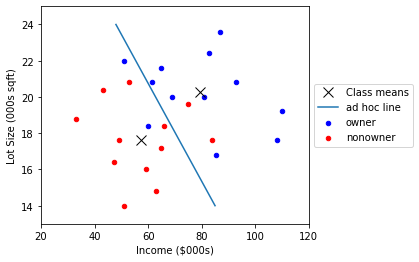

In [8]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='red', label='nonowner', ax=ax)

ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', label='Class means', markersize=10)

# manual set adhoc position for x and y
x_adhoc = np.array([48, 85])
y_adhoc = np.array([24, 14])

ax.plot(x_adhoc, y_adhoc, '-', color='C0', label='ad hoc line')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

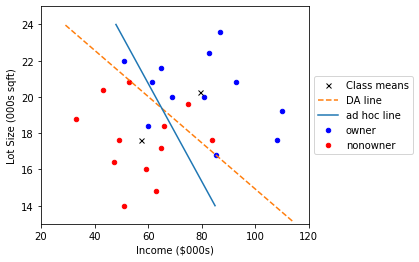

In [9]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='red', label='nonowner', ax=ax)

ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', label='Class means', markersize=5)
x_lda = np.array(ax.get_xlim())
y_lda = (- intercept - c_income * x_lda) / c_lotSize
ax.plot(x_lda, y_lda, '--', color='C1', label='DA line')
ax.plot(x_adhoc, y_adhoc, '-', color='C0', label='ad hoc line')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# stopped here
# plt.show()

## Table 12.2

In [10]:
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

result_df = mower_df.copy()
result_df.index = result_df.index + 1
result_df['Dec. Function'] = da_reg.decision_function(mower_df.drop(columns=['Ownership']))
result_df['Prediction'] = da_reg.predict(mower_df.drop(columns=['Ownership']))
result_df['p(Owner)'] = da_reg.predict_proba(mower_df.drop(columns=['Ownership']))[:, 1]

print(result_df)

    Income  Lot_Size Ownership  Dec. Function Prediction  p(Owner)
1     60.0      18.4     Owner      -1.277545   Nonowner  0.217968
2     85.5      16.8     Owner       0.022032      Owner  0.505508
3     64.8      21.6     Owner       1.716152      Owner  0.847632
4     61.5      20.8     Owner       0.757244      Owner  0.680755
5     87.0      23.6     Owner       5.511634      Owner  0.995977
6    110.1      19.2     Owner       4.372141      Owner  0.987533
7    108.0      17.6     Owner       2.905362      Owner  0.948111
8     82.8      22.4     Owner       4.148445      Owner  0.984456
9     69.0      20.0     Owner       0.880823      Owner  0.706993
10    93.0      20.8     Owner       3.914499      Owner  0.980440
11    51.0      22.0     Owner       0.647047      Owner  0.656345
12    81.0      20.0     Owner       2.083587      Owner  0.889298
13    75.0      19.6  Nonowner       1.168131      Owner  0.762807
14    52.8      20.8  Nonowner      -0.114760   Nonowner  0.47

## Table 12.3

In [11]:
# %%script false

accidents_df = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/Business-apps/main/Data/ACCIDENT.CSV')
lda_reg = LinearDiscriminantAnalysis()
lda_reg.fit(accidents_df.drop(columns=['MAX_SEV']), accidents_df['MAX_SEV'])

print('Coefficients and intercept')
fct = pd.DataFrame([lda_reg.intercept_], columns=lda_reg.classes_, index=['constant'])
fct = fct.append(pd.DataFrame(lda_reg.coef_.transpose(), columns=lda_reg.classes_, 
                              index=list(accidents_df.columns)[:-1]))
print(fct)
print()
classificationSummary(accidents_df['MAX_SEV'], 
                      lda_reg.predict(accidents_df.drop(columns=['MAX_SEV'])),
                      class_names=lda_reg.classes_)
accidents_df.MAX_SEV.value_counts()

Coefficients and intercept
                       0             1  ...             8             9
constant   -1.880240e+05 -3.287846e+05  ...  1.137900e+07  1.139954e+07
CASENUM     9.335492e-07  1.631732e-06  ... -5.818378e-05 -5.818082e-05
PSU        -1.709277e-02 -1.348137e-02  ...  7.261094e-01  6.877297e-01
PJ         -4.929131e-05 -3.695070e-05  ...  1.782709e-03  1.916329e-03
STRATUM     1.325709e+00 -5.293221e-01  ... -5.144034e+00 -5.158698e+00
VE_TOTAL    1.488435e-01  3.265885e-01  ... -9.038077e+00 -9.674880e+00
VE_FORMS   -3.119512e-01 -5.193316e-02  ...  1.287916e+01  1.260056e+01
PVH_INVL    2.880546e+00  2.403226e+00  ... -1.373648e+02 -1.396984e+02
PEDS        1.894101e+00 -1.114302e+00  ...  2.282569e+00 -4.341164e+00
PERMVIT     6.902394e-01  3.182808e-01  ... -2.709547e+01 -2.725325e+01
PERNOTMVIT -1.492818e+00 -2.273111e+00  ...  1.053617e+02  1.083238e+02
NUM_INJ    -1.579478e+02 -1.221862e+02  ...  6.722549e+03  6.518932e+03
MONTH      -4.460460e-02 -1.016582e-0

0    21383
1    10962
2     7409
3     4653
4      903
9      852
5      332
8       15
6        2
Name: MAX_SEV, dtype: int64

In [12]:
# %%script false
lda_reg.intercept_

array([ -188023.97677725,  -328784.61822057,  -192014.87836192,
        -257236.89036818,  -288079.00344611,  1024739.76878623,
         728933.91069327, 11379004.06321866, 11399537.55680937])

## Table 12.4

In [13]:
# %%script false
result = pd.concat([
    pd.DataFrame({'Classification': lda_reg.predict(accidents_df.drop(columns=['MAX_SEV'])),
                  'Actual': accidents_df['MAX_SEV']}),
    pd.DataFrame(lda_reg.decision_function(accidents_df.drop(columns=['MAX_SEV'])), 
                 columns=['Score {}'.format(cls) for cls in lda_reg.classes_]),
    pd.DataFrame(lda_reg.predict_proba(accidents_df.drop(columns=['MAX_SEV'])), 
                 columns=['Propensity {}'.format(cls) for cls in lda_reg.classes_])
], axis=1)

pd.set_option('precision',2)
pd.set_option('chop_threshold', .01)
print(result.head())

   Classification  Actual  Score 0  ...  Propensity 6  Propensity 8  Propensity 9
0               0       0   194.82  ...      0.00e+00           0.0           0.0
1               1       1    70.90  ...      0.00e+00           0.0           0.0
2               3       3  -106.31  ...      0.00e+00           0.0           0.0
3               0       0   190.18  ...      0.00e+00           0.0           0.0
4               2       2   -13.33  ...      0.00e+00           0.0           0.0

[5 rows x 20 columns]


## 12.5 Prior probabilities

In [14]:
da_reg_prior = LinearDiscriminantAnalysis(priors=[0.85,0.15])
da_reg_prior.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

c_income = da_reg_prior.coef_[0, 0]
c_lotSize = da_reg_prior.coef_[0, 1]
intercept = da_reg_prior.intercept_[0]

print('Decision function')
print(' = {:.2f}*Income + {:.2f}*Lot_Size + {:.2f}'.format(c_income, c_lotSize, intercept))


data = [[75, 19.6]]
print('\nExample Income=$75K Lot_Size=19.6Kft2')
print('  {} (no-priors) => {} (priors)'.format(da_reg.predict(data)[0], da_reg_prior.predict(data)[0]))

data = [[84, 17.6]]
print('\nExample Income=$84K Lot_Size=17.6Kft2')
print('  {} (no-priors) => {} (priors)'.format(da_reg.predict(data)[0], da_reg_prior.predict(data)[0]))


Decision function
 = 0.10*Income + 0.79*Lot_Size + -23.47

Example Income=$75K Lot_Size=19.6Kft2
  Owner (no-priors) => Nonowner (priors)

Example Income=$84K Lot_Size=17.6Kft2
  Owner (no-priors) => Nonowner (priors)


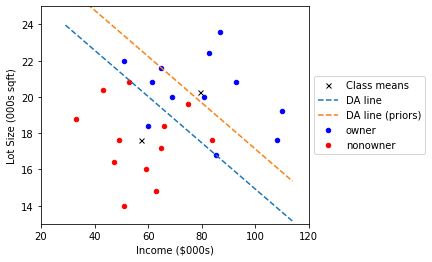

In [15]:
ax = mower_df[mower_df.Ownership=='Owner'].plot.scatter(x='Income', y='Lot_Size', c='blue', label='owner')
mower_df[mower_df.Ownership!='Owner'].plot.scatter(x='Income', y='Lot_Size', c='red', label='nonowner', ax=ax)

ax.plot(da_reg.means_[:,0], da_reg.means_[:,1], 'x', color='black', label='Class means', markersize=5)
x_lda_prior = np.array(ax.get_xlim())
y_lda_prior = (- intercept - c_income * x_lda) / c_lotSize
ax.plot(x_lda, y_lda, '--', label='DA line')
ax.plot(x_lda_prior, y_lda_prior, '--', label='DA line (priors)')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot Size (000s sqft)')
ax.set_xlim(20, 120)
ax.set_ylim(13, 25)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Figure 12.2

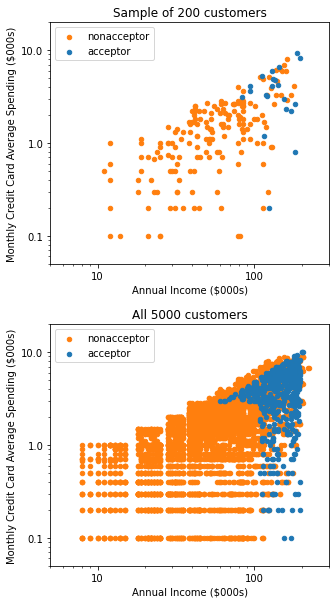

In [16]:
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

universal_df = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/Business-apps/main/Data/UniversalBank.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[5, 10])
plt.subplots_adjust(hspace=0.25)
# plt.tight_layout()

def createGraph(df, title, ax):
    ccIdx = df[df['PersonalLoan'] == 0].index
    df.loc[ccIdx].plot(x='Income', y='CCAvg', kind='scatter',
                              label='nonacceptor', color='C1',
                              ylim = (0.05, 20), xlim = (5, 300),
                              logx=True, logy=True, ax=ax)
    df.drop(ccIdx).plot(x='Income', y='CCAvg', kind='scatter',
                              label='acceptor', color='C0',
                              ylim = (0.05, 20), xlim = (5, 300),
                              logx=True, logy=True, ax=ax)
    ax.set_xlabel('Annual Income ($000s)')
    ax.set_ylabel('Monthly Credit Card Average Spending ($000s)')
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_title(title)
createGraph(universal_df.sample(200, random_state=10), 'Sample of 200 customers', axes[0])
createGraph(universal_df, 'All 5000 customers', axes[1])
plt.show()

In [17]:
universal_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
universal_df.shape

(5000, 14)